# Credit Card Fraud Analysis

You can find the dataset used for this analysis at https://www.kaggle.com/mlg-ulb/creditcardfraud 

For the classification of this dataset, Logistic Regression, K-Nearest Neighbors and Support Vector Machine were applied

#### Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

#### Loading the dataset

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Checking for the null values of each column 

In [4]:
display(df.isnull().sum(axis = 0))

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Removing 'Time' column since it doesn't need for the analysis and it saves the memory

In [5]:
df.drop('Time', axis = 1, inplace = True)

#### Visualizing statistical details of each column

In [6]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### From above statistical details of each column, it can be boticed that 'Amount' column has higher standard deviation

In [7]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

#### Since K-NN and SVM will be applied, standardizing the data will provide better results  

In [8]:
sc = StandardScaler()

df['Amount'] = sc.fit_transform(df['Amount'].values.reshape(-1,1))

df['Amount'].describe()

count    2.848070e+05
mean     2.913952e-17
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: Amount, dtype: float64

#### Defining the target class

In [9]:
target = df['Class'].values

#### Removing the target class and Defining rest of the variables as features

In [10]:
data = df.drop('Class', axis = 1).values

#### Splitting the data as training and testing

In [11]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.2)

### Applying Logistic Regression

In [12]:
lr = LogisticRegression()

lr.fit(train_data, train_target)

ylr_tr_pred = lr.predict(train_data)
ylr_pred = lr.predict(test_data)

ylr_tr_acc = accuracy_score(train_target, ylr_tr_pred)
ylr_pred_acc = accuracy_score(test_target, ylr_pred)

print('Training Accuracy of Logistic Regression : ', ylr_tr_acc)
print('Testing Accuracy of Logistic Regression : ', ylr_pred_acc)

Training Accuracy of Logistic Regression :  0.9992275450415853
Testing Accuracy of Logistic Regression :  0.9989993328885924


#### Visualizing the predictions of test data of Logistic Regression in Confusion Matrix

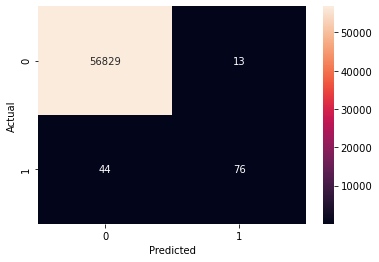

In [13]:
sns.heatmap(confusion_matrix(test_target, ylr_pred), annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Applying K-Nearest Neighbors

In [15]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(train_data, train_target)

yknn_tr_pred = knn.predict(train_data)
yknn_pred = knn.predict(test_data)

yknn_tr_acc = accuracy_score(train_target, yknn_tr_pred)
yknn_pred_acc = accuracy_score(test_target, yknn_pred)

print('Training Accuracy of K-NN : ', yknn_tr_acc)
print('Testing Accuracy of K-NN : ', yknn_pred_acc)

Training Accuracy of K-NN :  0.9995874388290285
Testing Accuracy of K-NN :  0.9995084442259752


#### Visualizing the predictions of test data of K-NN in Confusion Matrix

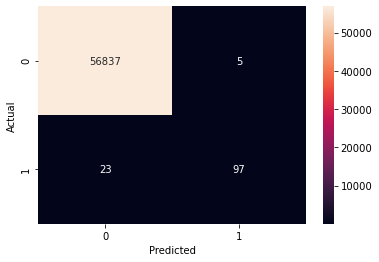

In [16]:
sns.heatmap(confusion_matrix(test_target, yknn_pred), annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Applying SVM

In [17]:
svm = SVC()

svm.fit(train_data, train_target)

ysvm_tr_pred = svm.predict(train_data)
ysvm_pred = svm.predict(test_data)

ysvm_tr_acc = accuracy_score(train_target, ysvm_tr_pred)
ysvm_pred_acc = accuracy_score(test_target, ysvm_pred)

print('Training Accuracy of SVM : ', ysvm_tr_acc)
print('Testing Accuracy of SVM : ', ysvm_pred_acc)

Training Accuracy of SVM :  0.9996620509556936
Testing Accuracy of SVM :  0.9992626663389628


#### Visualizing the predictions of test data of SVM in Confusion Matrix

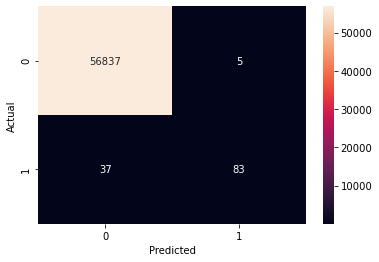

In [18]:
sns.heatmap(confusion_matrix(test_target, ysvm_pred), annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()